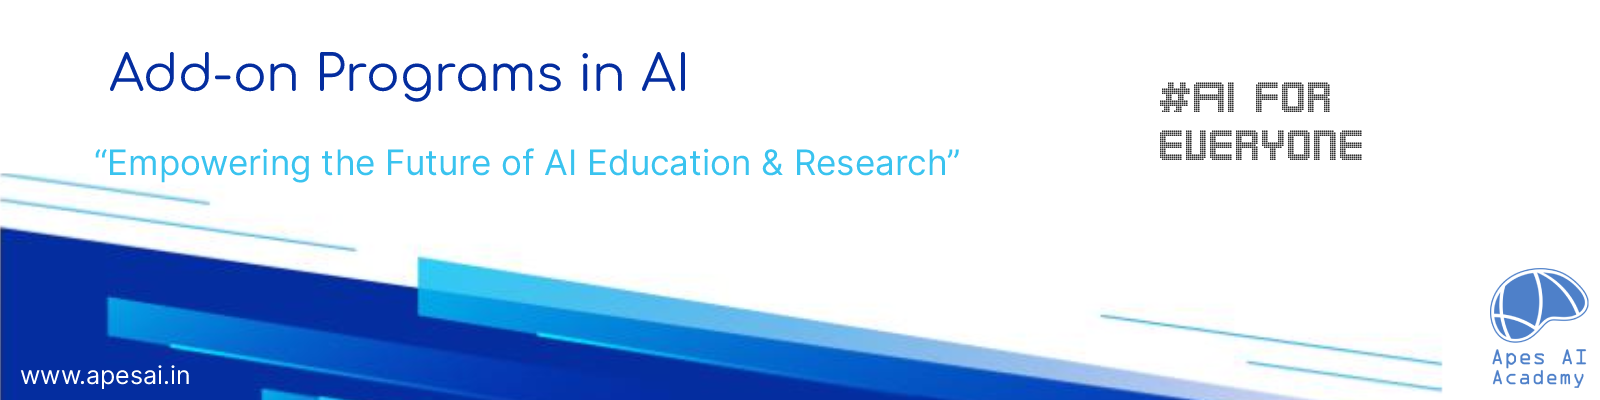

# Task



*   Load MNIST dataset (Hand written digits dataset)
*   Train DNN and experiment with different number of layers and neurons.
*  Now train the DNN with only two class from the dataset (A binary classifier using DNN)
* Apply Normalization to the image data and then train, and analyze the improvement.


**Search and find the code/solution and solve errors. Do not use any Copilot*



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tf.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

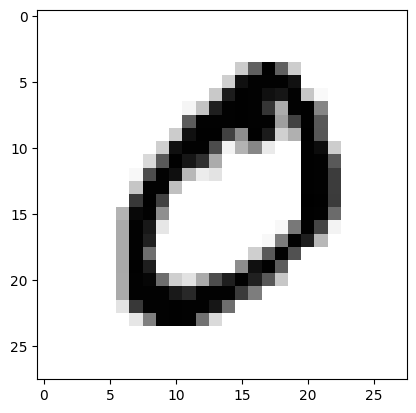

In [7]:
plt.imshow(X_train[1], cmap = 'binary')
plt.show()

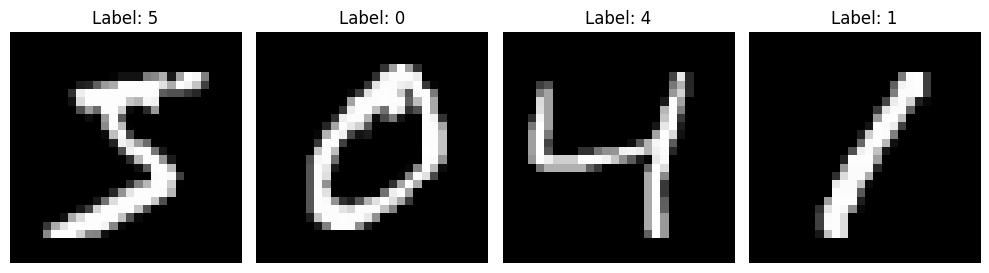

In [8]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
y_train[1]

np.uint8(0)

In [10]:
y_train[3]

np.uint8(1)

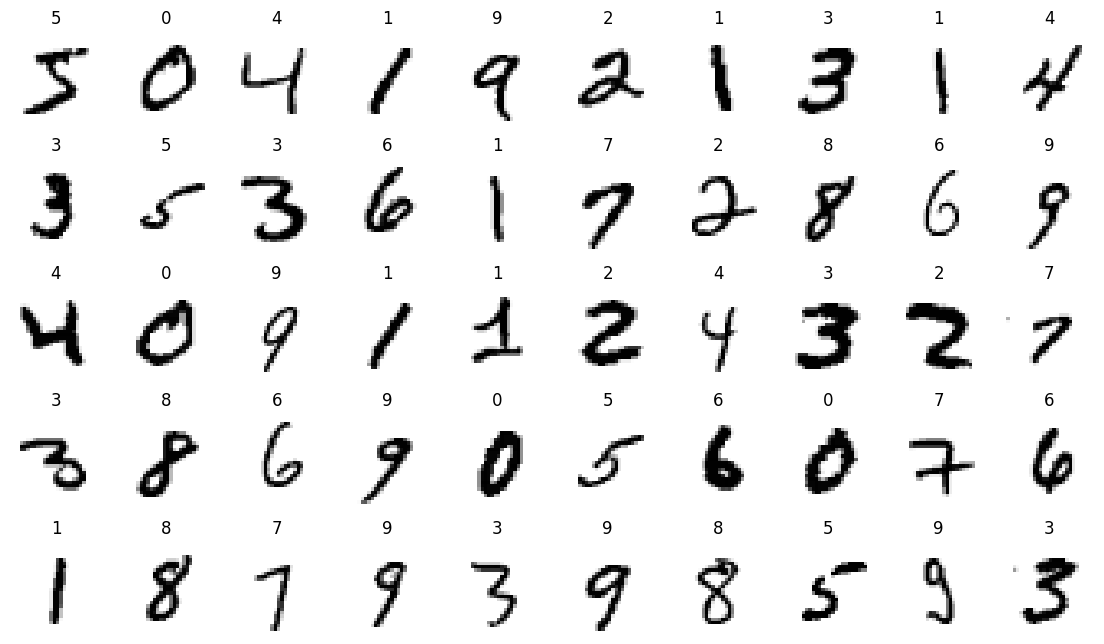

In [11]:
class_names = [0,1,2,3,4,5,6,7,8,9]

n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [61]:
DNN = keras.models.Sequential()
DNN.add(keras.layers.Flatten(input_shape = [28,28]))
DNN.add(keras.layers.Dense(600, activation = 'relu'))
DNN.add(keras.layers.Dense(300, activation = 'relu'))
DNN.add(keras.layers.Dense(100, activation = 'relu'))
DNN.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [63]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [64]:
history_DNN = DNN.fit(X_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8466 - loss: 3.9001 - val_accuracy: 0.9505 - val_loss: 0.1832
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9459 - loss: 0.1978 - val_accuracy: 0.9515 - val_loss: 0.1845
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9571 - loss: 0.1529 - val_accuracy: 0.9642 - val_loss: 0.1312
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9629 - loss: 0.1282 - val_accuracy: 0.9687 - val_loss: 0.1163
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9694 - loss: 0.1060 - val_accuracy: 0.9737 - val_loss: 0.1049
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9749 - loss: 0.0913 - val_accuracy: 0.9728 - val_loss: 0.1108
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9769 - loss: 0.0861 - val_accuracy: 0.9748 - val_loss: 0.1012
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9802 - loss: 

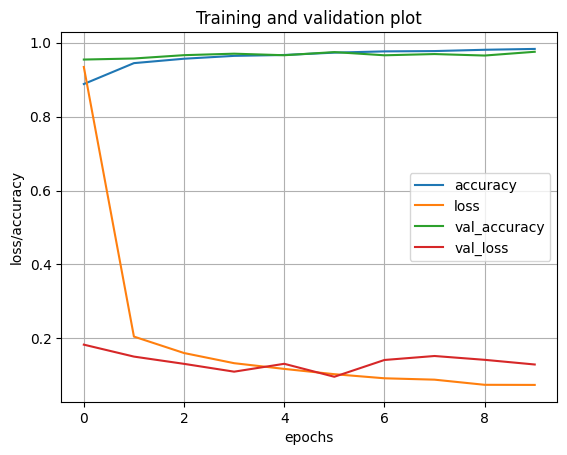

In [17]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [18]:
test_loss, test_accuracy = DNN.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.1685
Test loss: 0.13669975101947784, Test accuracy: 0.9749000072479248


USING DIFFERENT NUMBER OF LAYERS AND NEURONS

In [20]:
DNN2 = keras.models.Sequential()
DNN2.add(keras.layers.Flatten(input_shape = [28,28]))
DNN2.add(keras.layers.Dense(500, activation = 'relu'))
DNN2.add(keras.layers.Dense(400, activation = 'relu'))
DNN2.add(keras.layers.Dense(200, activation = 'relu'))
DNN2.add(keras.layers.Dense(100, activation = 'relu'))
DNN2.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
DNN2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [23]:
history_DNN2 = DNN2.fit(X_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8318 - loss: 2.1828 - val_accuracy: 0.9365 - val_loss: 0.2230
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9455 - loss: 0.1964 - val_accuracy: 0.9567 - val_loss: 0.1605
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9575 - loss: 0.1505 - val_accuracy: 0.9642 - val_loss: 0.1388
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9659 - loss: 0.1278 - val_accuracy: 0.9620 - val_loss: 0.1389
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9708 - loss: 0.1074 - val_accuracy: 0.9670 - val_loss: 0.1256
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9753 - loss: 0.0918 - val_accuracy: 0.9677 - val_loss: 0.1311
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9770 - loss: 0.0862 - val_accuracy: 0.9748 - val_loss: 0.1045
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9791 - los

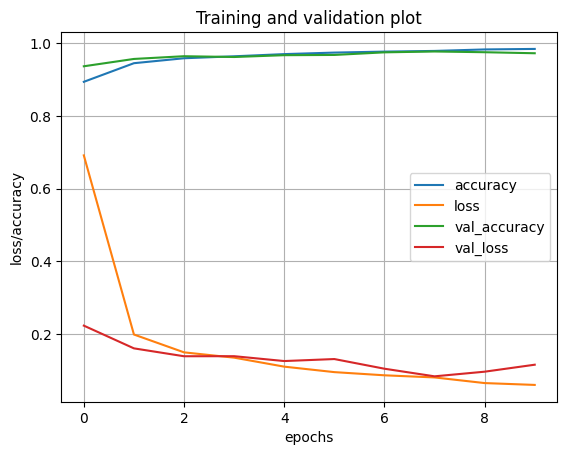

In [24]:
import pandas as pd
pd.DataFrame(history_DNN2.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [25]:
test_loss, test_accuracy = DNN2.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9709 - loss: 0.1317
Test loss: 0.10793579369783401, Test accuracy: 0.9753999710083008


SLIGHT INCREASE IN ACCURACY

# BINARY CLASSIFIER USING DNN

In [34]:
import numpy as np
train_filter = np.where((y_train == 4) | (y_train== 5))
x_train_binary = X_train[train_filter]
y_train_binary = y_train[train_filter]
y_train_binary[y_train_binary == 4] = 0
y_train_binary[y_train_binary == 5] = 1

In [28]:
x_train_binary.shape

(11263, 28, 28)

In [29]:
y_train_binary.shape

(11263,)

In [35]:
import numpy as np
test_filter = np.where((y_test == 4) | (y_test== 5))
x_test_binary = X_test[test_filter]
y_test_binary = y_test[test_filter]
y_test_binary[y_test_binary == 4] = 0
y_test_binary[y_test_binary == 5] = 1

In [32]:
x_test_binary.shape

(1874, 28, 28)

In [31]:
y_test_binary.shape

(1874,)

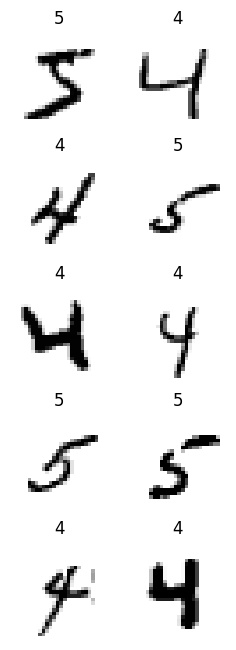

In [36]:
class_names = [4,5]

n_rows = 5
n_cols = 2
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train_binary[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train_binary[index]])

In [38]:
model_binary = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model_binary.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [40]:
history_binary = model_binary.fit(x_train_binary, y_train_binary, epochs=10, validation_split=0.1)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9532 - loss: 2.0129 - val_accuracy: 0.9858 - val_loss: 0.4869
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.1168 - val_accuracy: 0.9920 - val_loss: 0.3166
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9970 - loss: 0.0672 - val_accuracy: 0.9885 - val_loss: 0.5271
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9962 - loss: 0.0717 - val_accuracy: 0.9965 - val_loss: 0.1932
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0182 - val_accuracy: 0.9956 - val_loss: 0.2261
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0049 - val_accuracy: 0.9929 - val_loss: 0.3928
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9970 - loss: 0.0531 - val_accuracy: 0.9929 - val_loss: 0.3033
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0922 - val_accuracy: 0.

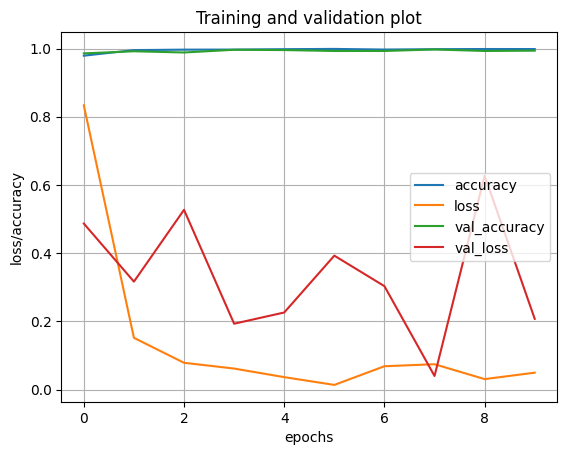

In [41]:
import pandas as pd
pd.DataFrame(history_binary.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [42]:
test_loss, test_accuracy = model_binary.evaluate(x_test_binary, y_test_binary)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0195
Test loss: 0.015827510505914688, Test accuracy: 0.9989327788352966


APPLYING NORMALIZATION

STANDARDIZATION

In [65]:
X_mean = X_train.mean()
X_std = X_train.std()

In [66]:
X_train_std = X_train - X_mean/(X_std)
X_test_std = X_test - X_mean/(X_std)


In [67]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
hist_std_DNN = DNN.fit(X_train,y_train,epochs=10,validation_split=0.1,callbacks=[[tbCallBack]])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9822 - loss: 0.0829 - val_accuracy: 0.9765 - val_loss: 0.1066
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9855 - loss: 0.0630 - val_accuracy: 0.9730 - val_loss: 0.1282
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9874 - loss: 0.0505 - val_accuracy: 0.9800 - val_loss: 0.1013
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9879 - loss: 0.0495 - val_accuracy: 0.9777 - val_loss: 0.1198
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9877 - loss: 0.0486 - val_accuracy: 0.9747 - val_loss: 0.1278
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9883 - loss: 0.0549 - val_accuracy: 0.9763 - val_loss: 0.1265
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9898 - loss: 0.0452 - val_accuracy: 0.9755 - val_loss: 0.1199
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9893 - loss: 0

After standardising there is a slight increase in accuracy(from 98.32 to 98.97)

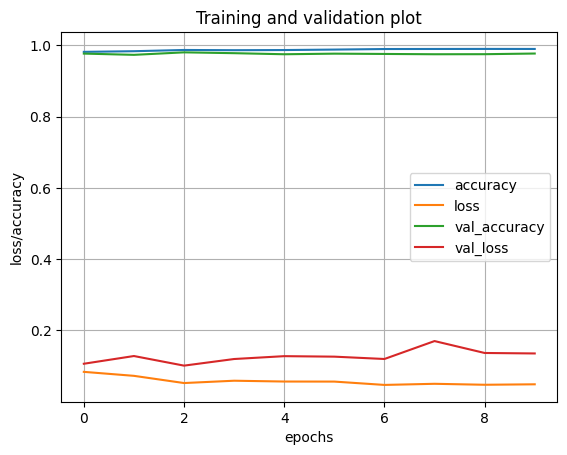

In [69]:
import pandas as pd
pd.DataFrame(hist_std_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [76]:
test_loss, test_accuracy = DNN.evaluate(X_test_std, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 42.3784
Test loss: 33.69938278198242, Test accuracy: 0.980400025844574


MIN-MAX NORMALIZATION

In [71]:
x_train_normalized = X_train / 255.0
x_test_normalized = X_test / 255.0



In [72]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [73]:
hist_nl_DNN = DNN.fit(x_train_normalized,y_train,epochs=10,validation_split=0.1,callbacks=[[tbCallBack]])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9365 - loss: 0.2036 - val_accuracy: 0.9807 - val_loss: 0.0738
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9949 - loss: 0.0152 - val_accuracy: 0.9818 - val_loss: 0.0753
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9813 - val_loss: 0.0779
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9795 - val_loss: 0.0929
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9788 - val_loss: 0.0912
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9842 - val_loss: 0.0876
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9823 - val_loss: 0.0959
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9973 - loss: 

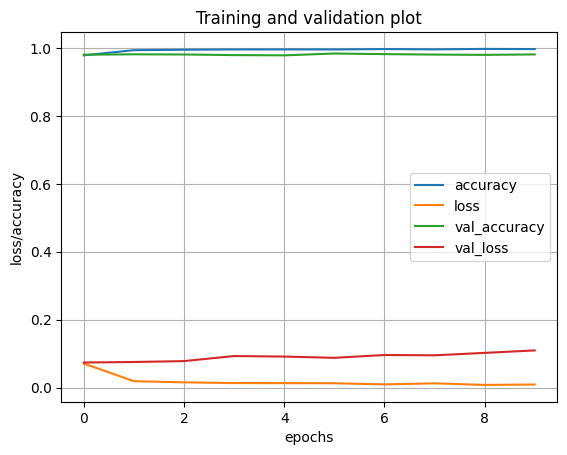

In [74]:
import pandas as pd
pd.DataFrame(hist_nl_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [75]:
test_loss, test_accuracy = DNN.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9756 - loss: 42.0432
Test loss: 33.4320182800293, Test accuracy: 0.9801999926567078


 Comparing with standardization,Min-max normalization has increase in accuracy from 98.32 to 99.77